# Student Exam Analysis

## Import Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Reading


In [83]:
Dataframe = pd.read_csv("exams.csv")
Dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


## Rename Column

In [84]:
# rename columns
Dataframe = Dataframe.rename(columns={"race/ethnicity":"Race_ethnicity", 
                                    "parental level of education": "Education", 
                                    "test preparation course":"Test_preparation_course", 
                                    "math score":"Math_score", 
                                    "reading score":"Reading_score",
                                    "writing score":"Writing_score"})
Dataframe.head()

,gender,Race_ethnicity,Education,lunch,Test_preparation_course,Math_score,Reading_score,Writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


## Information About the Data

In [85]:
Dataframe.shape

(1000, 8)

In [86]:
Dataframe.dtypes

gender                     object
Race_ethnicity             object
Education                  object
lunch                      object
Test_preparation_course    object
Math_score                  int64
Reading_score               int64
Writing_score               int64
dtype: object

In [87]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   Race_ethnicity           1000 non-null   object
 2   Education                1000 non-null   object
 3   lunch                    1000 non-null   object
 4   Test_preparation_course  1000 non-null   object
 5   Math_score               1000 non-null   int64 
 6   Reading_score            1000 non-null   int64 
 7   Writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [88]:
Dataframe.isnull().sum()

gender                     0
Race_ethnicity             0
Education                  0
lunch                      0
Test_preparation_course    0
Math_score                 0
Reading_score              0
Writing_score              0
dtype: int64

In [89]:
Dataframe.describe()

,Math_score,Reading_score,Writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


## Data Analysis

### categorical value counts

In [90]:
Dataframe['gender'].value_counts()

male      517
female    483
Name: gender, dtype: int64

In [91]:
Dataframe['Education'].value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: Education, dtype: int64

In [92]:
Dataframe['Race_ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: Race_ethnicity, dtype: int64

In [93]:
Dataframe['lunch'].value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [94]:
Dataframe['Test_preparation_course'].value_counts()

none         665
completed    335
Name: Test_preparation_course, dtype: int64

In [95]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   Race_ethnicity           1000 non-null   object
 2   Education                1000 non-null   object
 3   lunch                    1000 non-null   object
 4   Test_preparation_course  1000 non-null   object
 5   Math_score               1000 non-null   int64 
 6   Reading_score            1000 non-null   int64 
 7   Writing_score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [96]:
Dataframe.describe()

,Math_score,Reading_score,Writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


### adding Total and Average Columns

In [97]:
Dataframe['Total'] = Dataframe['Math_score'] + Dataframe['Reading_score'] + Dataframe['Writing_score']

In [98]:
Dataframe['Average'] = Dataframe['Total']/3

In [99]:
Dataframe.head()

,gender,Race_ethnicity,Education,lunch,Test_preparation_course,Math_score,Reading_score,Writing_score,Total,Average
0,male,group A,high school,standard,completed,67,67,63,197,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,154,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,169,56.333333
3,male,group B,high school,standard,none,77,78,68,223,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,219,73.000000


### Data Visualizations

In [100]:
def bar_plot(variable):

    var = Dataframe[variable]
    
    varValue = var.value_counts()
    

    plt.figure(figsize =(5,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

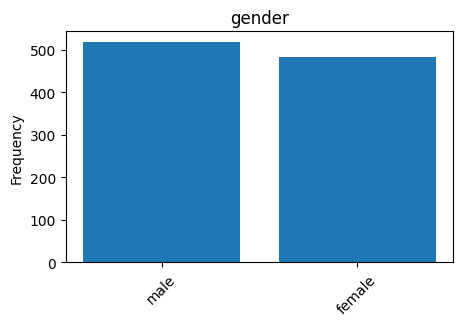

gender: 
 male      517
female    483
Name: gender, dtype: int64


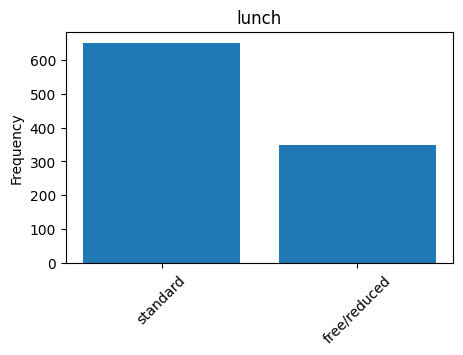

lunch: 
 standard        652
free/reduced    348
Name: lunch, dtype: int64


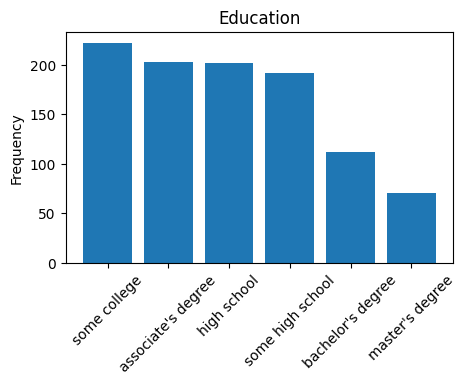

Education: 
 some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: Education, dtype: int64


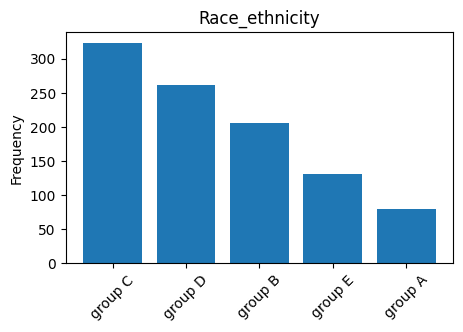

Race_ethnicity: 
 group C    323
group D    262
group B    205
group E    131
group A     79
Name: Race_ethnicity, dtype: int64


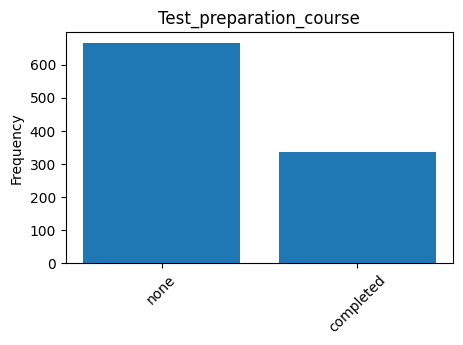

Test_preparation_course: 
 none         665
completed    335
Name: Test_preparation_course, dtype: int64


In [101]:
category1 = ["gender", "lunch", "Education", "Race_ethnicity", "Test_preparation_course"]

for gender in category1:
    
    bar_plot(gender)

#### gender distribution

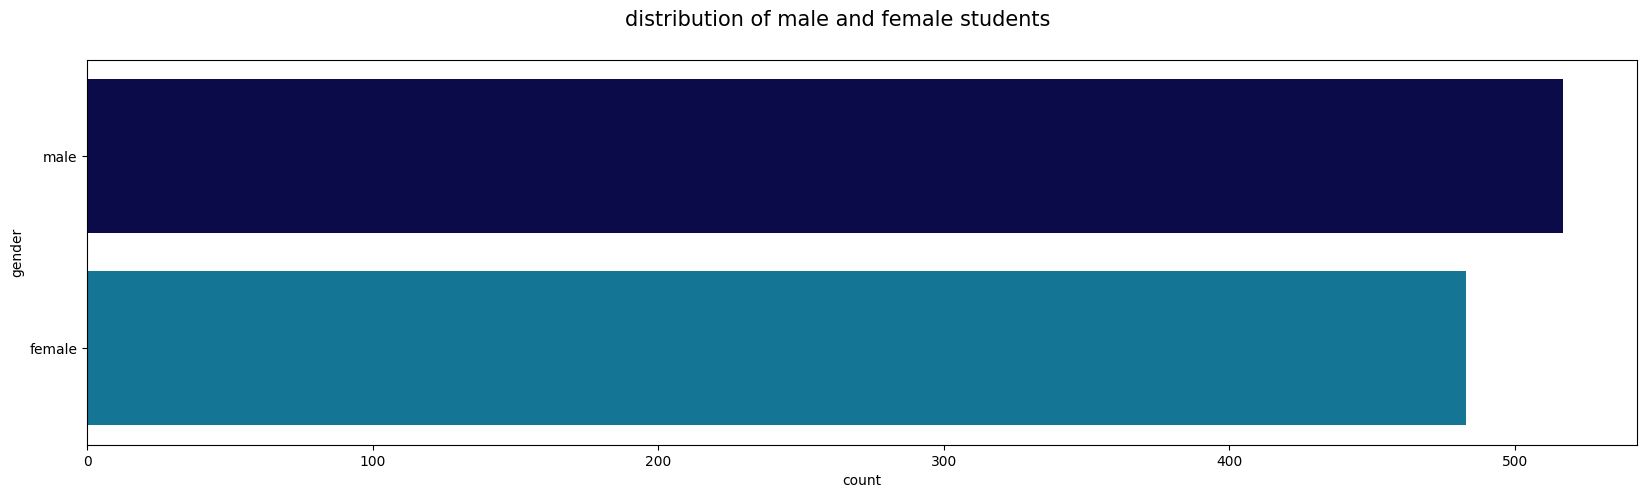

In [102]:
# gender distribution

plt.figure(figsize=(20,5))
plt.suptitle("distribution of male and female students", fontsize = 15)
gender = sns.countplot(data=Dataframe, y=Dataframe['gender'], palette="ocean")
plt.show()


#### race ethnicity distibution

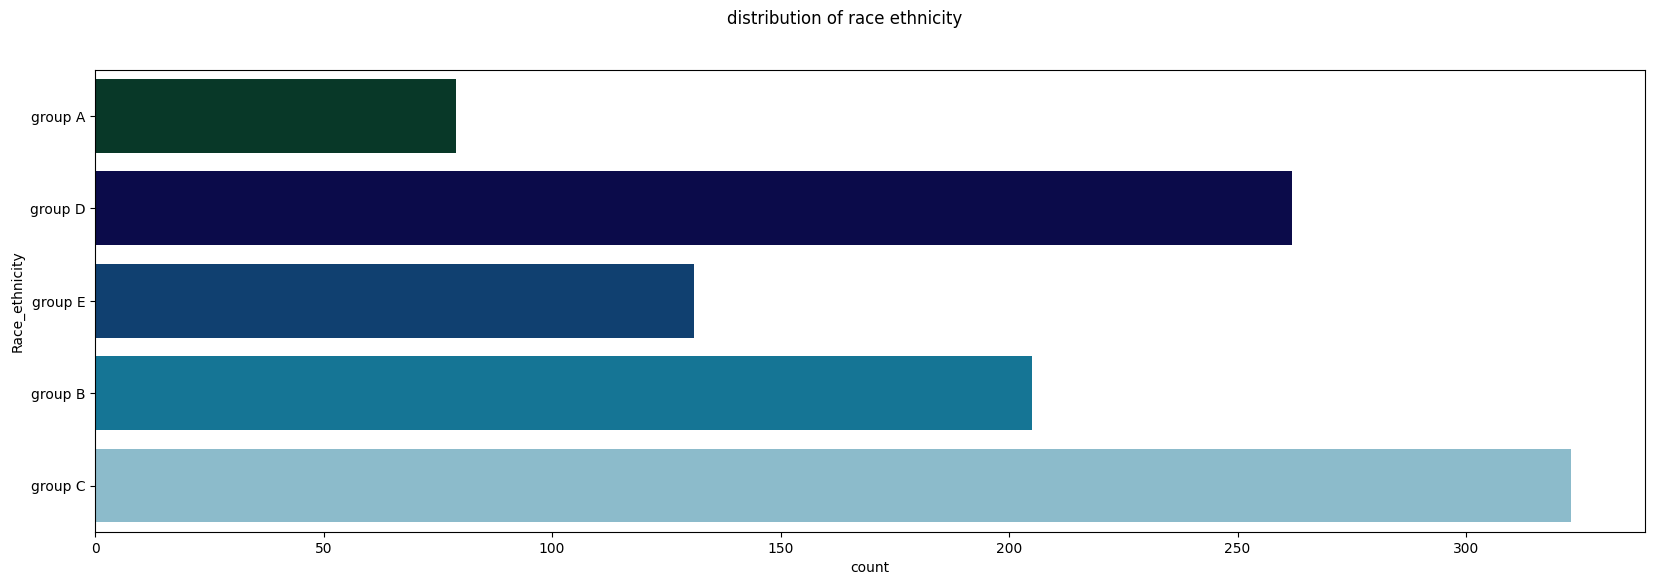

In [103]:
# race ethnicity distibution

plt.figure(figsize=(20,6))
race = sns.countplot(Dataframe, y='Race_ethnicity', palette="ocean")
plt.suptitle("distribution of race ethnicity")
plt.show()

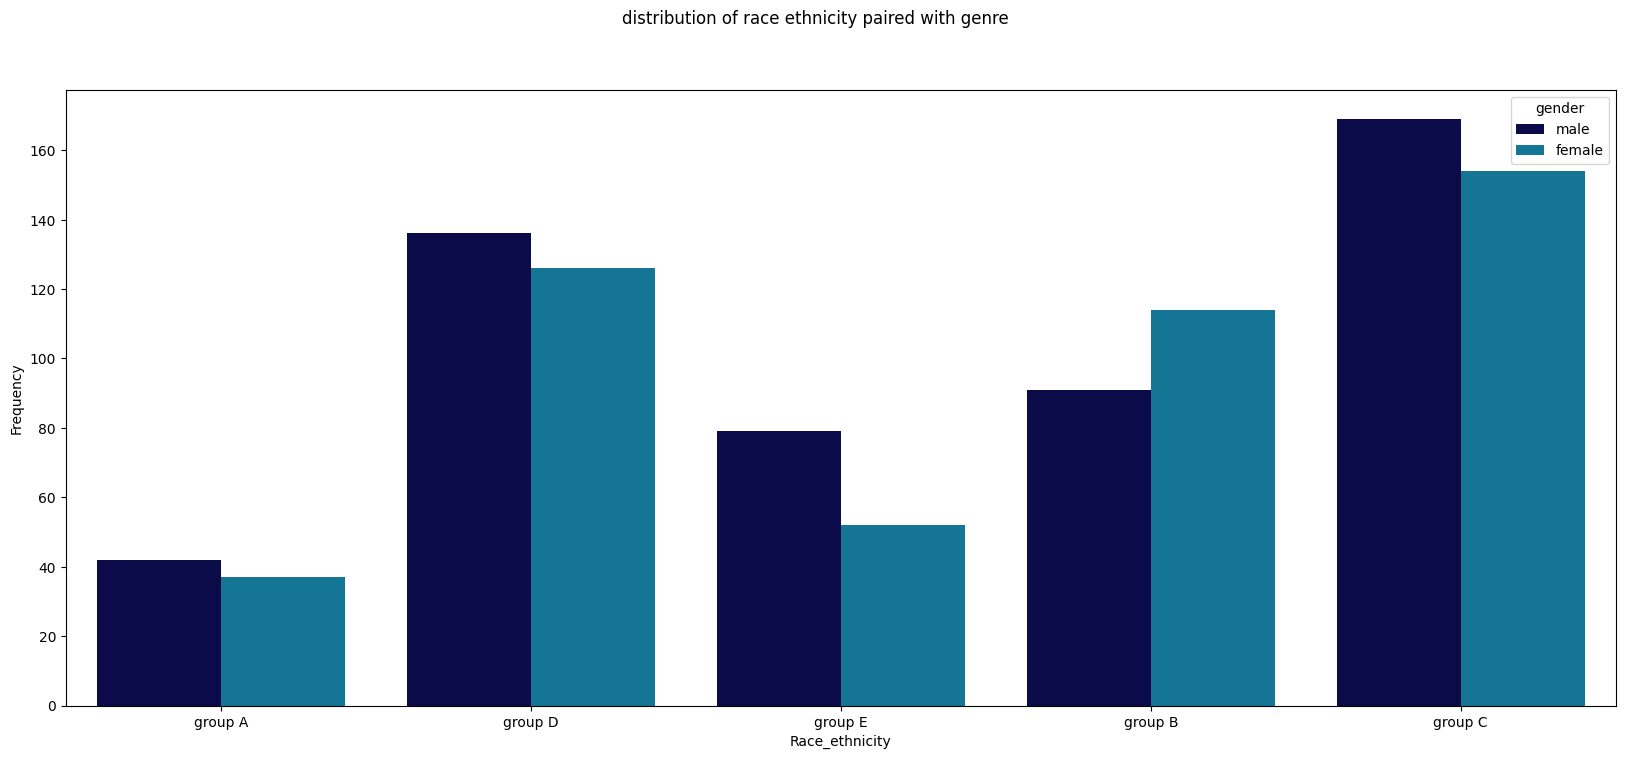

In [104]:
# race distribution paired with gender

plt.figure(figsize=(20,8))
sns.countplot(data=Dataframe,x="Race_ethnicity", hue="gender", palette="ocean")
# sns.countplot(x=Dataframe["Race_ethnicity"], hue=Dataframe["gender"], palette="ocean")
plt.xlabel("Race_ethnicity")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.suptitle("distribution of race ethnicity paired with genre")
plt.show()

#### education

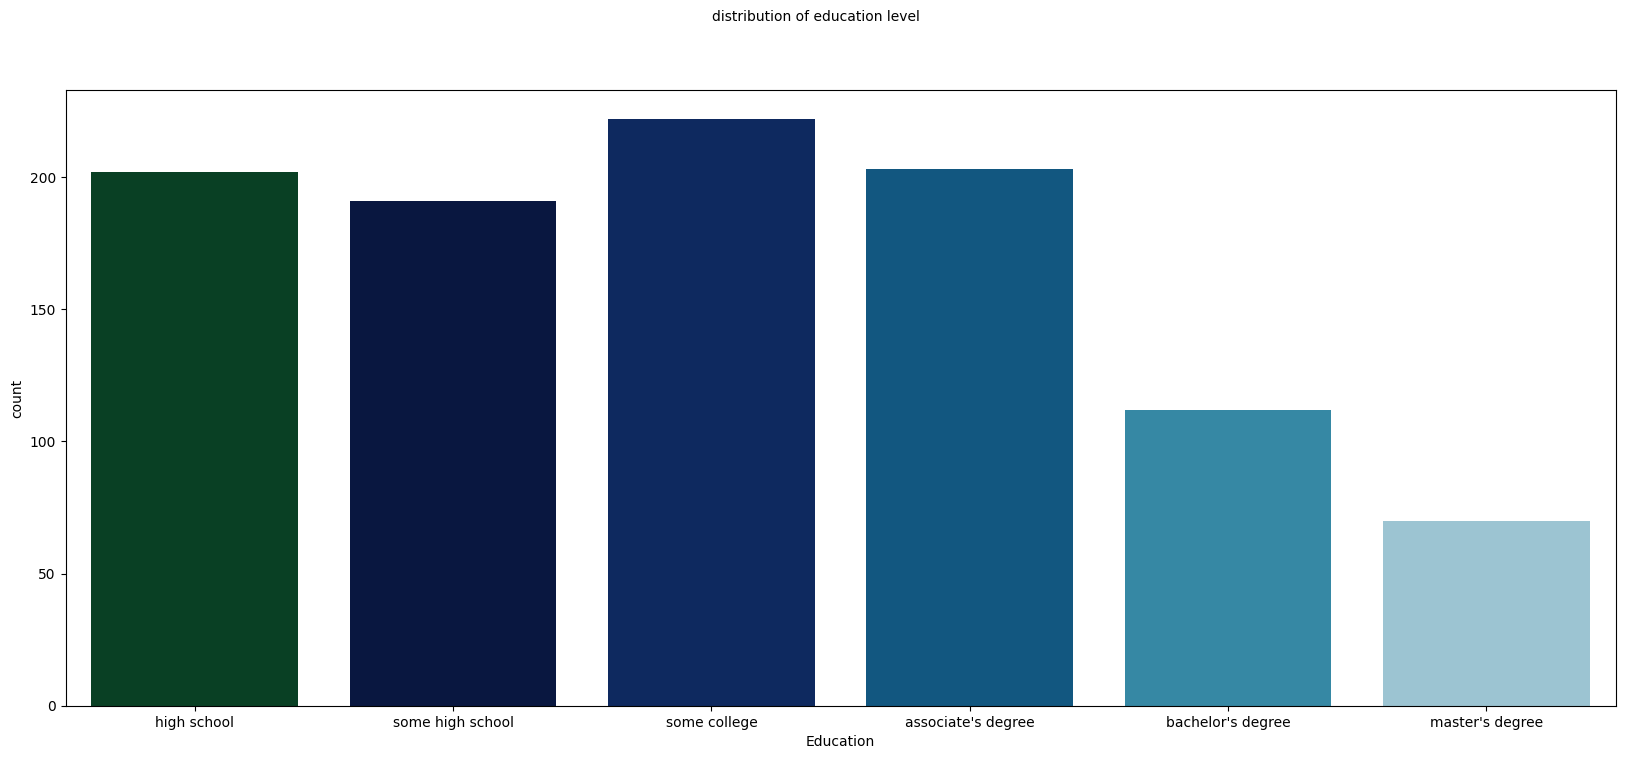

In [105]:
# Education level

colors= ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#FF5733', '#853C2C']

plt.figure(figsize=(20,8))
plt.xticks(rotation=0)
ax = sns.countplot(data=Dataframe, x="Education", palette="ocean")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.suptitle("distribution of education level", fontsize=10)
plt.show()

In [106]:
Dataframe[Dataframe.gender=="female"].Race_ethnicity.value_counts()

group C    154
group D    126
group B    114
group E     52
group A     37
Name: Race_ethnicity, dtype: int64

In [107]:
Dataframe[Dataframe.gender=="male"].Race_ethnicity.value_counts()

group C    169
group D    136
group B     91
group E     79
group A     42
Name: Race_ethnicity, dtype: int64

In [108]:
Dataframe[Dataframe.gender=="female"].Race_ethnicity.value_counts(normalize=True)

group C    0.318841
group D    0.260870
group B    0.236025
group E    0.107660
group A    0.076605
Name: Race_ethnicity, dtype: float64

In [109]:
Dataframe[Dataframe.gender=="male"].Race_ethnicity.value_counts(normalize=True)

group C    0.326886
group D    0.263056
group B    0.176015
group E    0.152805
group A    0.081238
Name: Race_ethnicity, dtype: float64

### Test preparation course on every score tests

#### *Math*

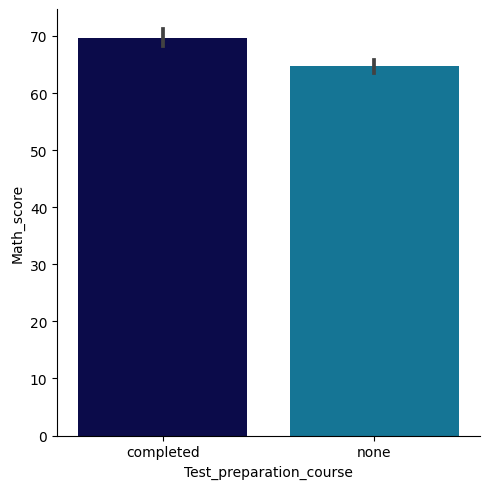

In [110]:
sns.catplot(data=Dataframe, x="Test_preparation_course", y="Math_score", kind="bar", palette="ocean")
plt.show()

#### *Reading*

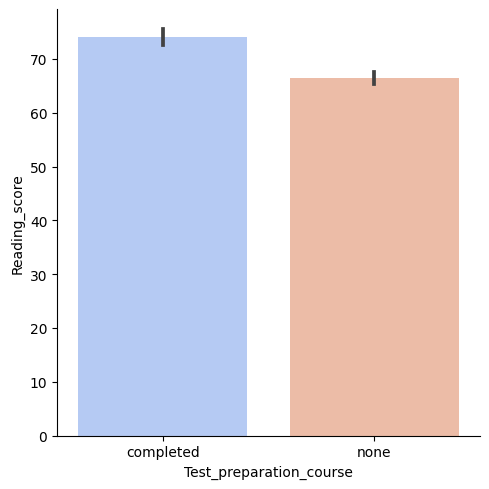

In [111]:
sns.catplot(data=Dataframe, x="Test_preparation_course", y="Reading_score", kind="bar", palette="coolwarm")
plt.show()

#### *Writing*

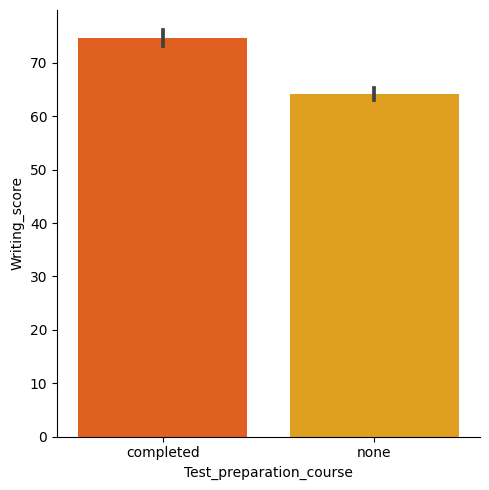

In [112]:
sns.catplot(data=Dataframe, x="Test_preparation_course", y="Writing_score", kind="bar", palette="autumn")
plt.show()

### Score Distribution

Text(0, 0.5, 'Frequency')

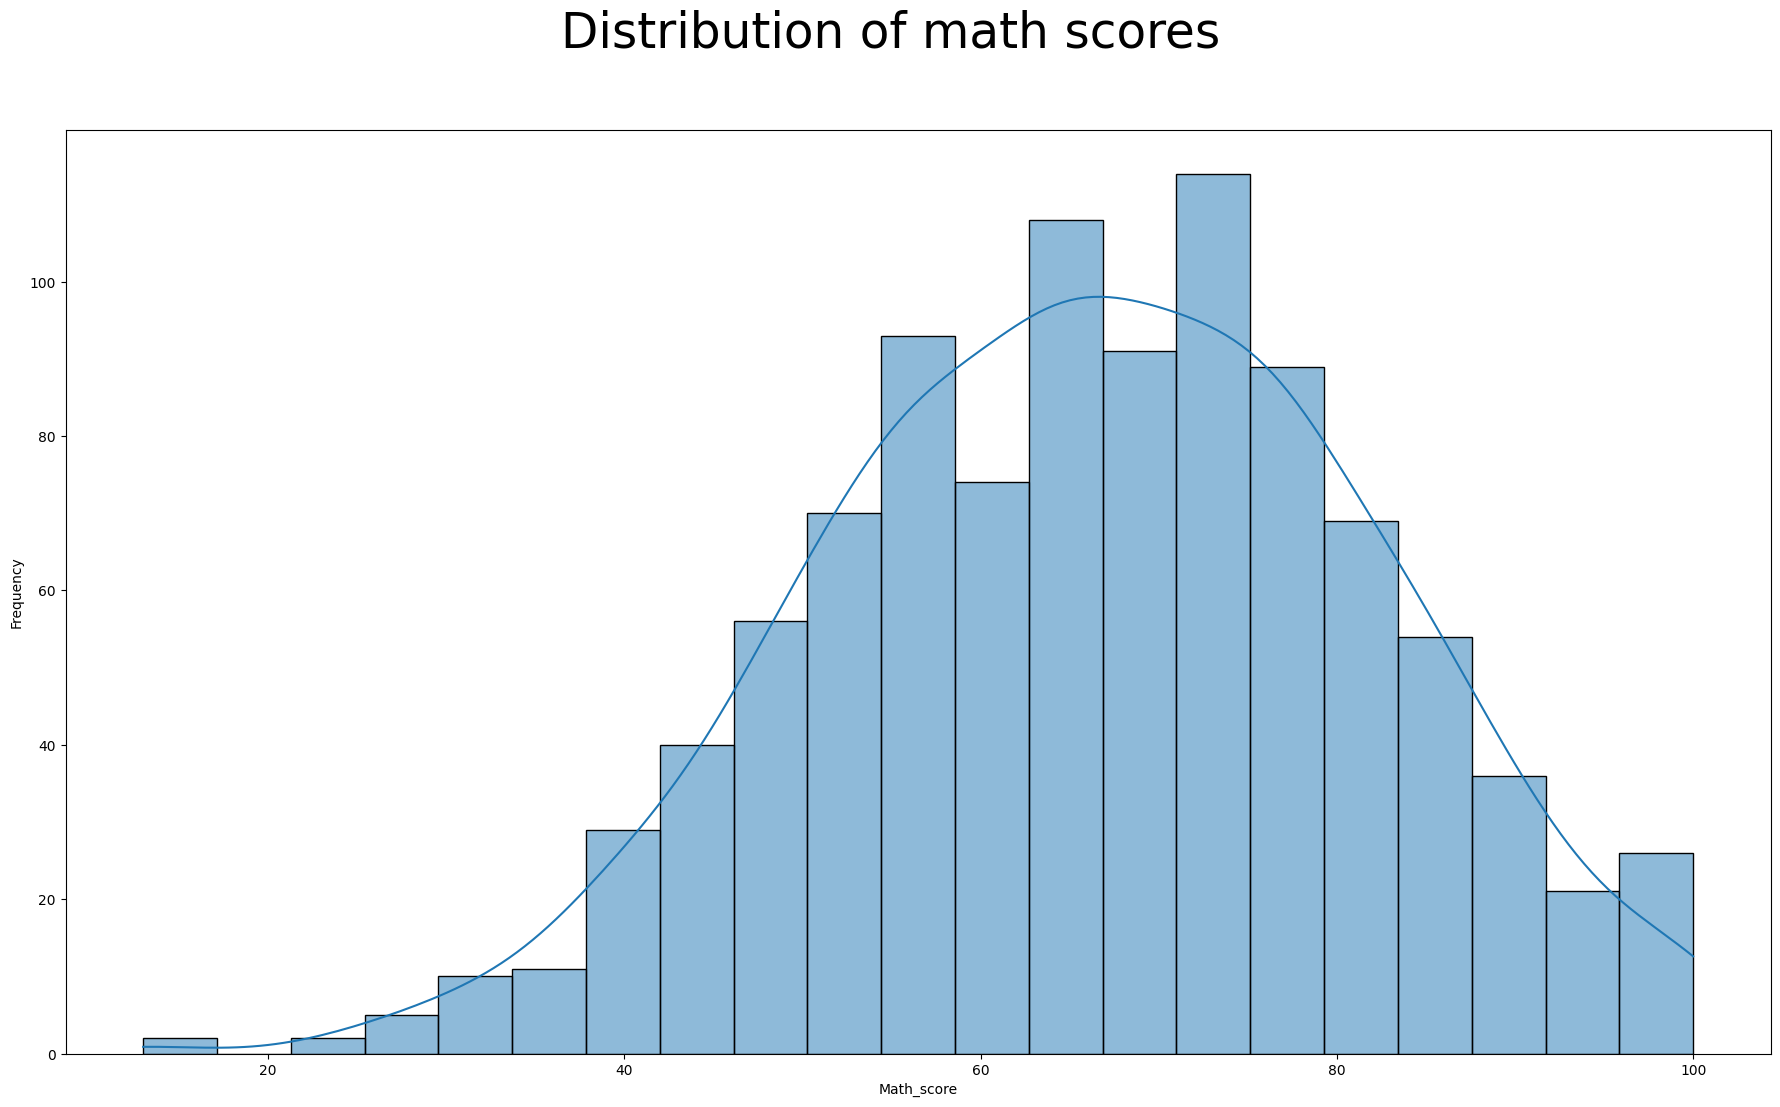

In [183]:
# Math

plt.figure(figsize=(22, 12))
sns.histplot(data=Dataframe, x="Math_score", kde=True)
plt.xticks(fontsize= 10)
plt.suptitle("Distribution of math scores", fontsize = 35)
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

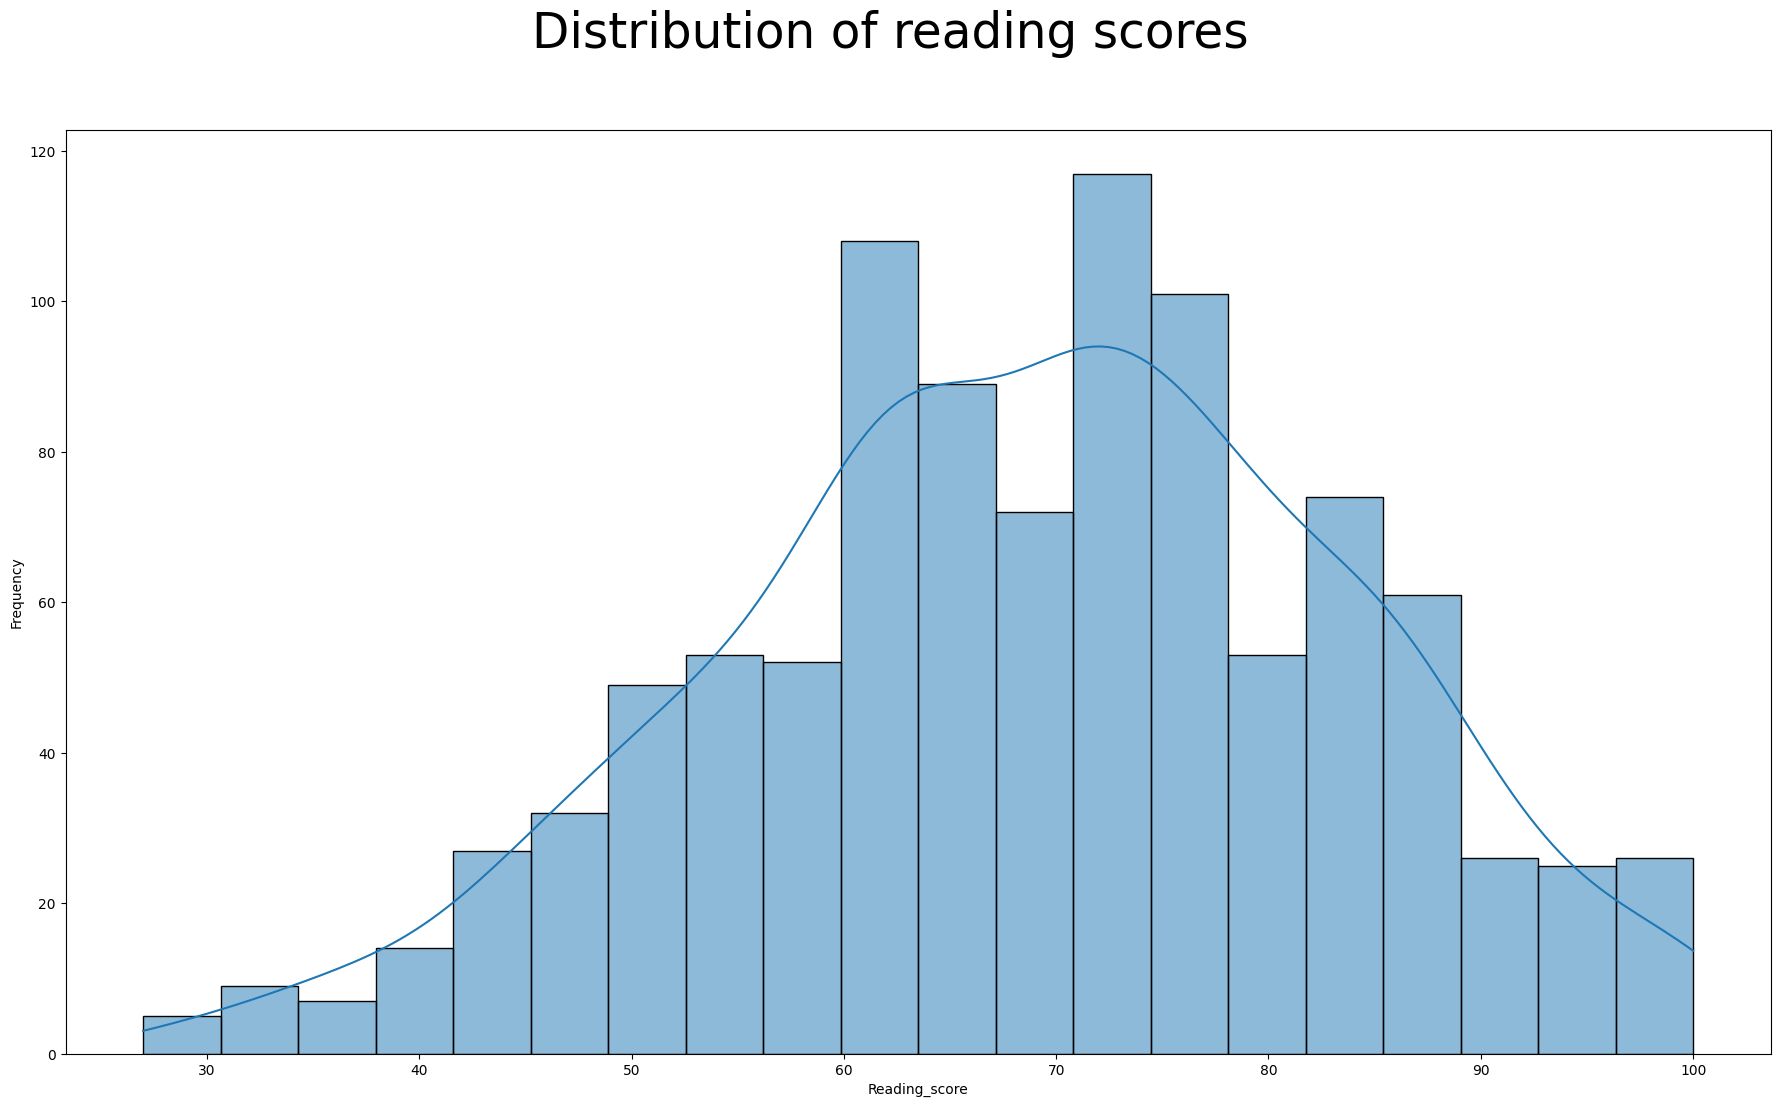

In [181]:
# Reading

plt.figure(figsize=(22, 12))
sns.histplot(data=Dataframe, x="Reading_score", kde=True)
plt.xticks(fontsize= 10)
plt.suptitle("Distribution of reading scores", fontsize = 35)
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

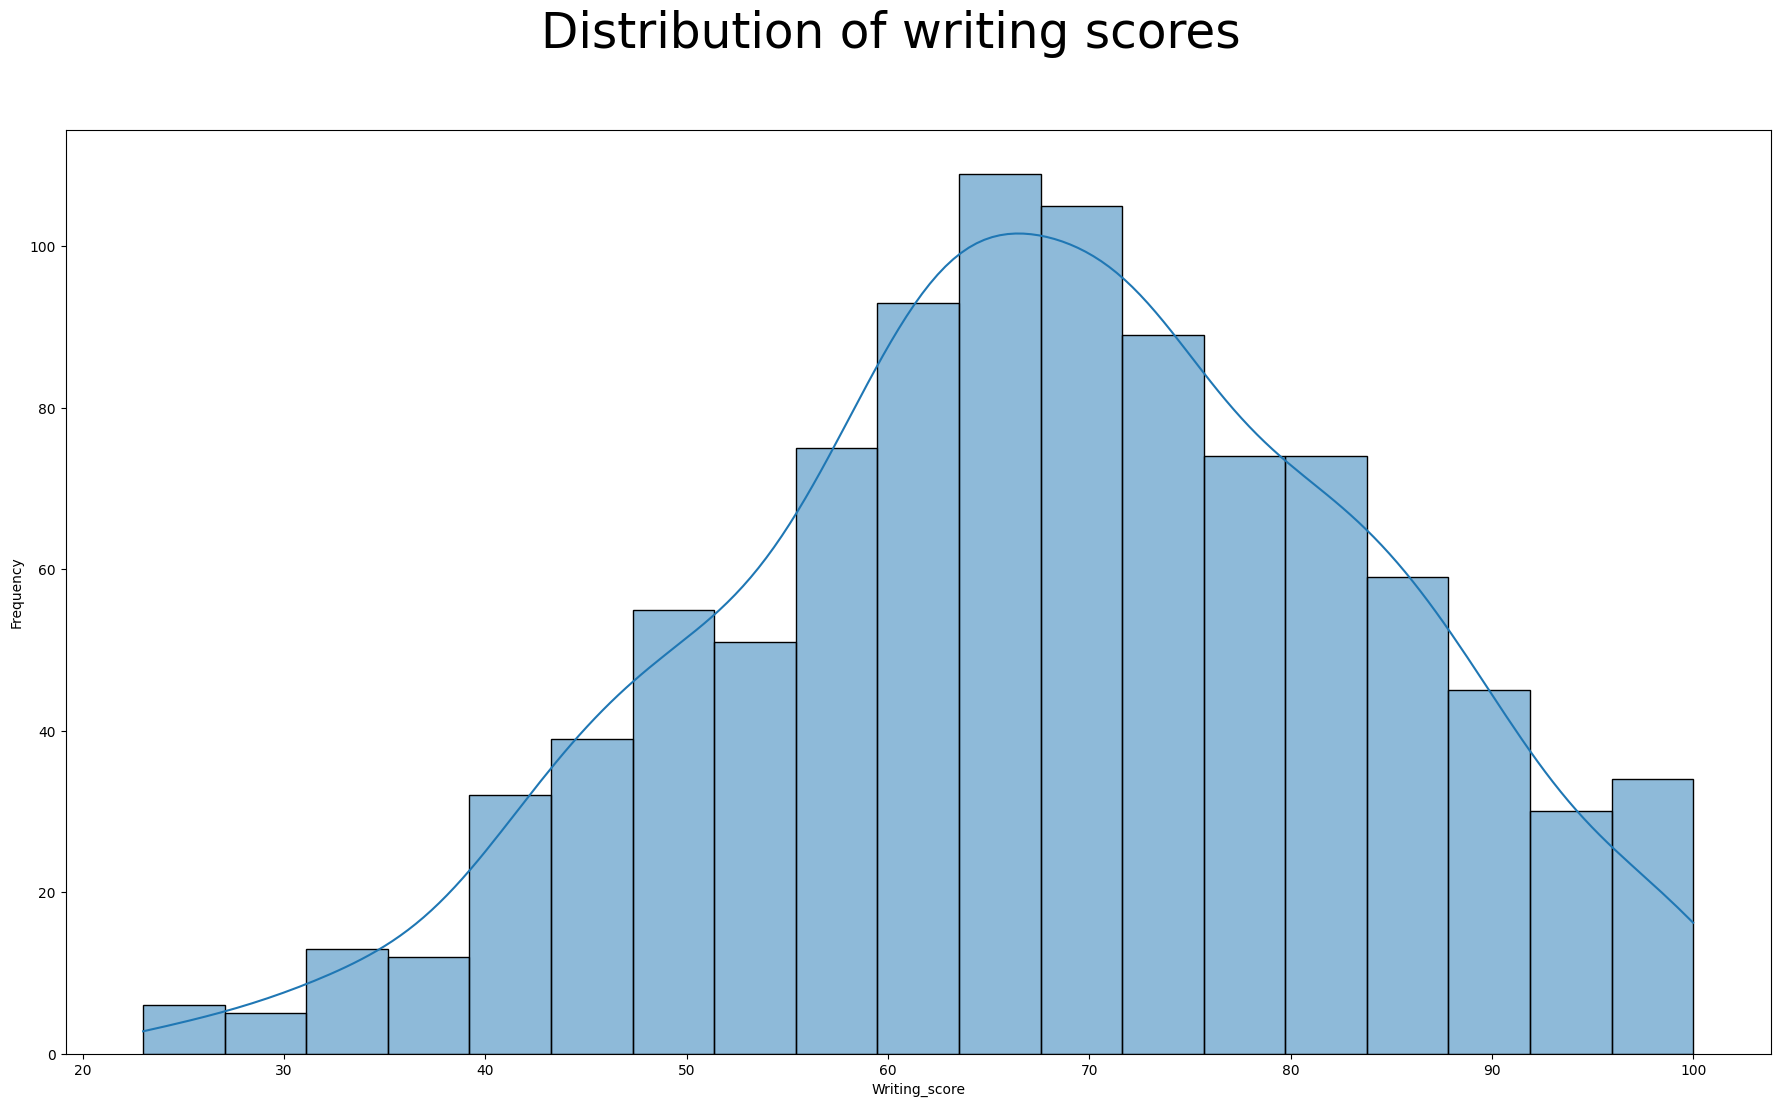

In [182]:
# Writing

plt.figure(figsize=(22, 12))
sns.histplot(data=Dataframe, x="Writing_score", kde=True)
plt.xticks(fontsize= 10)
plt.suptitle("Distribution of writing scores", fontsize = 35)
plt.ylabel("Frequency")

### Race ethnicity for every score tests

In [113]:
race_Math_score = Dataframe.groupby(["Race_ethnicity"])["Math_score"].mean()
race_Math_score

Race_ethnicity
group A    65.215190
group B    63.170732
group C    63.130031
group D    69.267176
group E    74.465649
Name: Math_score, dtype: float64

In [114]:
race_Reading_score = Dataframe.groupby(["Race_ethnicity"])["Reading_score"].mean()
race_Reading_score

Race_ethnicity
group A    68.556962
group B    67.102439
group C    66.383901
group D    72.087786
group E    72.526718
Name: Reading_score, dtype: float64

In [115]:
race_Writing_score = Dataframe.groupby(["Race_ethnicity"])["Writing_score"].mean()
race_Writing_score

Race_ethnicity
group A    66.974684
group B    65.736585
group C    64.523220
group D    72.259542
group E    70.213740
Name: Writing_score, dtype: float64

In [150]:
race_total_score = Dataframe.groupby(["Race_ethnicity"])["Total"].mean()
race_total_score

Race_ethnicity
group A    200.746835
group B    196.009756
group C    194.037152
group D    213.614504
group E    217.206107
Name: Total, dtype: float64

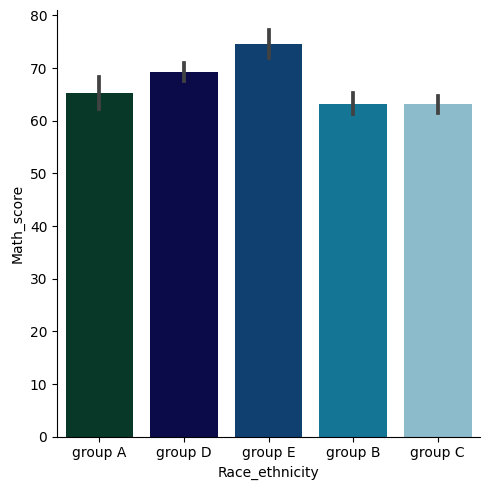

In [116]:
bar_race_mathScore = sns.catplot(data=Dataframe, x="Race_ethnicity", y="Math_score", kind="bar", palette="ocean")
bar_race_mathScore

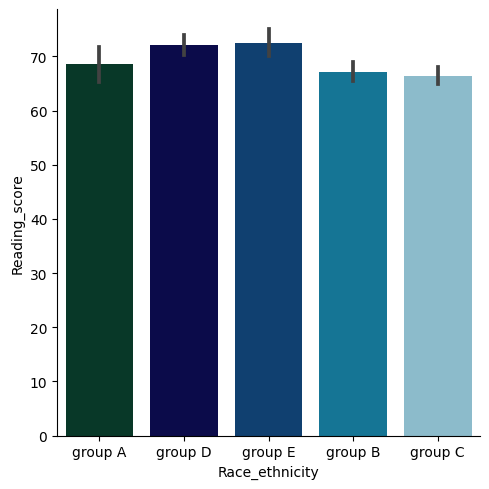

In [117]:
bar_race_readingScore = sns.catplot(data=Dataframe, x="Race_ethnicity", y="Reading_score", kind="bar", palette="ocean")
bar_race_readingScore

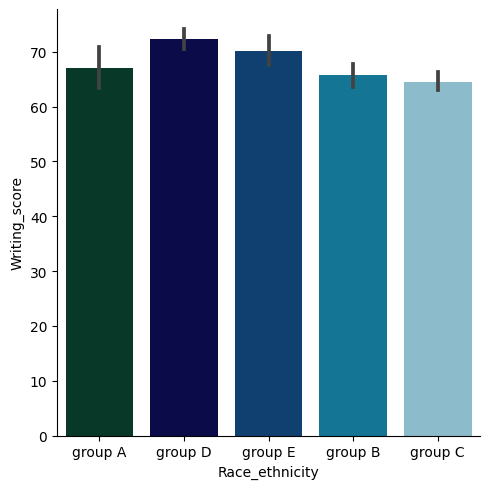

In [118]:
bar_race_writingScore = sns.catplot(data=Dataframe, x="Race_ethnicity", y="Writing_score", kind="bar", palette="ocean")
bar_race_writingScore

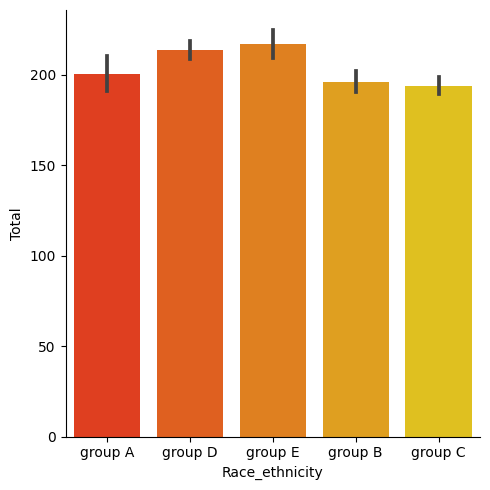

In [149]:
sns.catplot(data=Dataframe, x="Race_ethnicity", y="Total", kind="bar", palette="autumn")

### Education on Score tests

In [142]:
Edu_test_score = Dataframe[["Education","Math_score","Reading_score","Writing_score"]].groupby(["Education"]).mean().sort_values(by="Math_score",ascending = False)
Edu_test_score

,Math_score,Reading_score,Writing_score
Education,,,
master's degree,71.585714,75.428571,75.885714
bachelor's degree,71.491071,74.008929,74.410714
associate's degree,69.536946,70.985222,70.113300
some college,65.297297,68.045045,66.734234
high school,65.207921,67.400990,64.846535
some high school,60.701571,64.408377,62.539267


#### *Math score*

<AxesSubplot: xlabel='Math_score', ylabel='Education'>

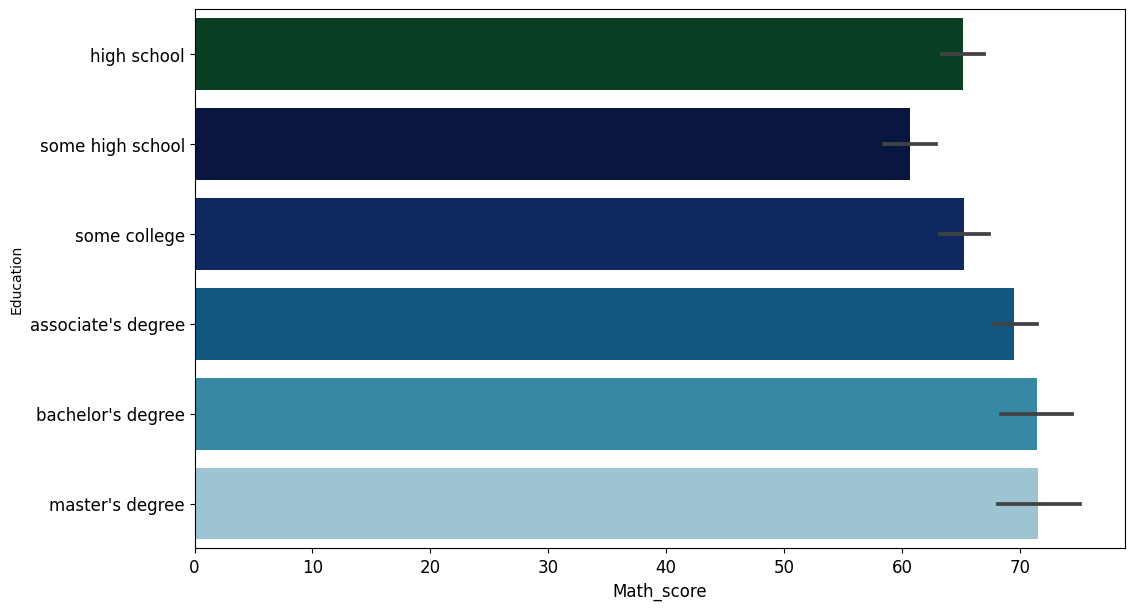

In [119]:
plt.figure(figsize=(12, 7))
plt.xticks(fontsize= 12)
plt.xlabel("Math Score", fontsize= 12)
plt.yticks(fontsize= 12)
sns.barplot(data=Dataframe, x="Math_score", y="Education", palette="ocean")

#### *Reading score*

<AxesSubplot: xlabel='Reading_score', ylabel='Education'>

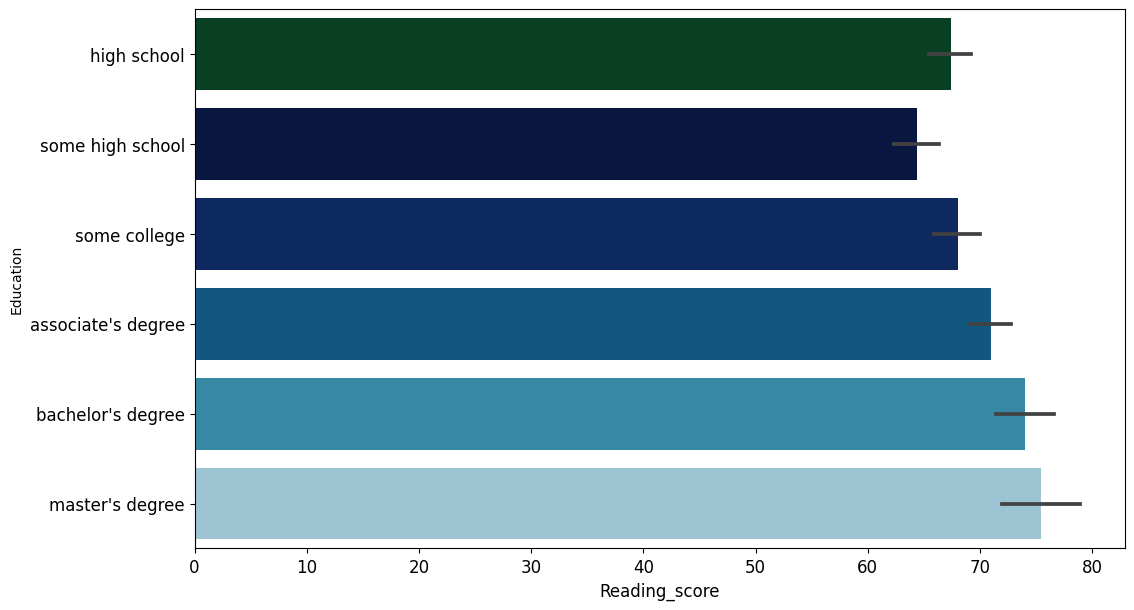

In [122]:
plt.figure(figsize=(12, 7))
plt.xticks(fontsize= 12)
plt.xlabel("Reading Score", fontsize= 12)
plt.yticks(fontsize= 12)
sns.barplot(data=Dataframe, x="Reading_score", y="Education", palette="ocean")

#### *Writing score*

<AxesSubplot: xlabel='Writing_score', ylabel='Education'>

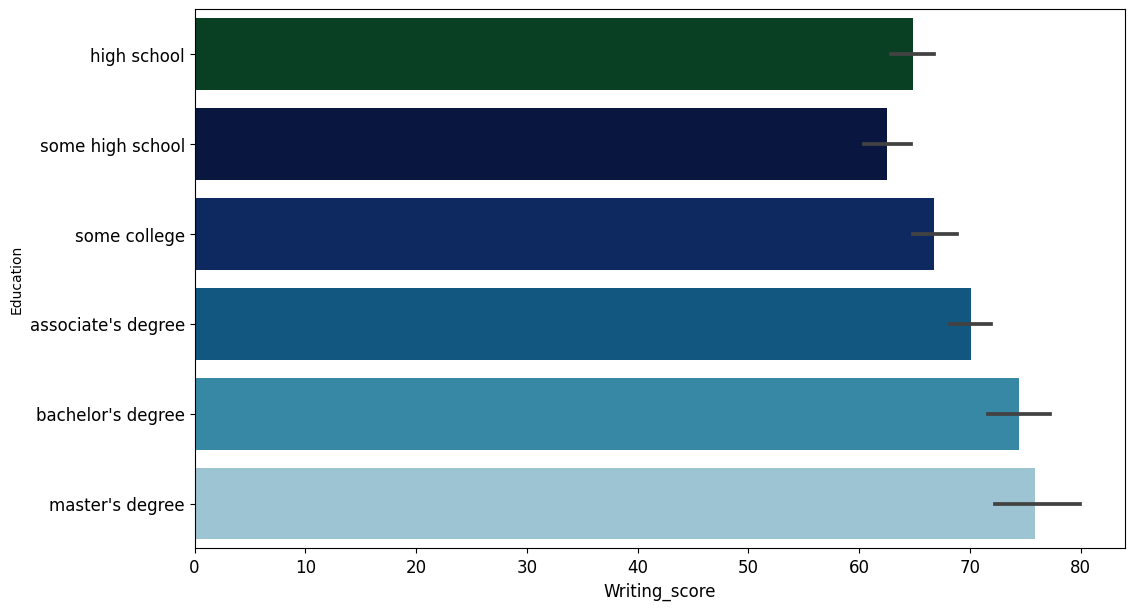

In [123]:
plt.figure(figsize=(12, 7))
plt.xticks(fontsize= 12)
plt.xlabel("Writing score", fontsize= 12)
plt.yticks(fontsize= 12)
sns.barplot(data=Dataframe, x="Writing_score", y="Education", palette="ocean")

### Lunch on Score Tests

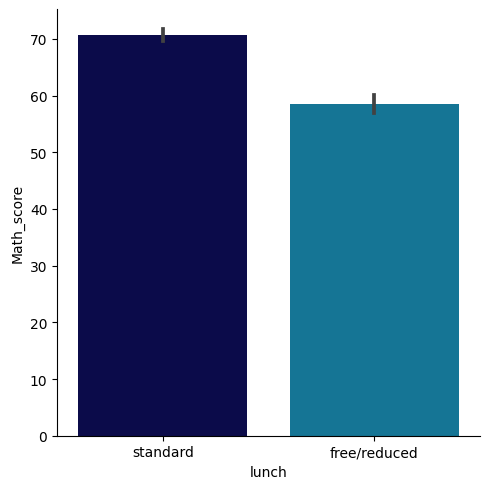

In [124]:
bar_lunch_mathScore = sns.catplot(data=Dataframe, x="lunch", y="Math_score", kind="bar", palette="ocean")
bar_lunch_mathScore

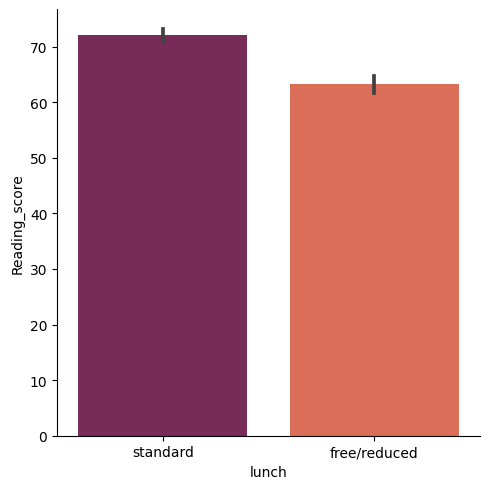

In [125]:
bar_lunch_readingScore = sns.catplot(data=Dataframe, x="lunch", y="Reading_score", kind="bar", palette="rocket")
bar_lunch_readingScore

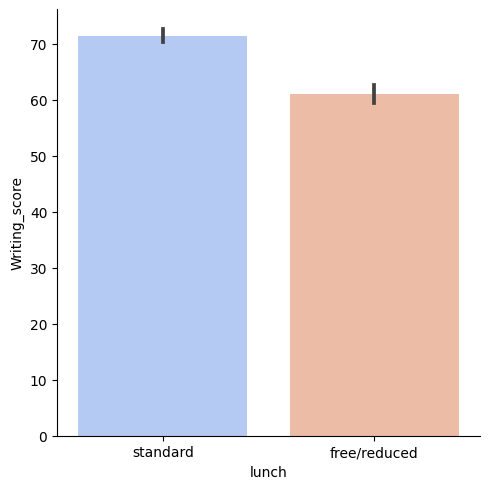

In [126]:
bar_lunch_writingScore = sns.catplot(data=Dataframe, x="lunch", y="Writing_score", kind="bar", palette="coolwarm")
bar_lunch_writingScore

In [141]:
Race_gender = Dataframe[["Race_ethnicity", "gender"]].groupby(["Race_ethnicity"]).value_counts()
Race_gender

Race_ethnicity  gender
group A         male       42
                female     37
group B         female    114
                male       91
group C         male      169
                female    154
group D         male      136
                female    126
group E         male       79
                female     52
dtype: int64